<a href="https://colab.research.google.com/github/i-am-parker01/Car-Price-Prediction-Model/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [25]:
data=pd.read_csv('car_data.csv.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
data.shape

(301, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [15]:
# Checking for the number of values in each categorical columns...
print(data['Fuel_Type'].value_counts())
print(data['Seller_Type'].value_counts())
print(data['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [33]:
# from sklearn import preprocessing
# le=preprocessing.LabelEncoder()
# data['Fuel_Type']=le.fit_transform(data['Fuel_Type'])
# data['Seller_Type']=le.fit_transform(data['Seller_Type'])
# data['Transmission']=le.fit_transform(data['Transmission'])

# Encoding the categorical data into numerical  data...
data.replace({'Fuel_Type':{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [34]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [36]:
# Splitting the data into train and test category
X=data.drop(['Selling_Price','Car_Name'],axis=1)
Y=data['Selling_Price']

In [37]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [38]:
Y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [42]:
#Training the Linear Regression Model...
lr=LinearRegression()
lr.fit(X_train  , Y_train)


LinearRegression()

In [53]:
# Model Evaluation
training_data_pred=lr.predict(X_train)

In [54]:
# R Squared Error
score=metrics.r2_score(Y_train,training_data_pred)
print(score)

0.8799451660493711


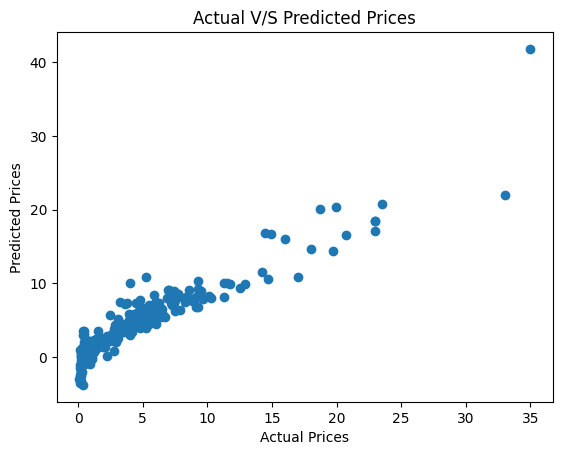

In [56]:
# Visualizing the actual and predicted prices
plt.scatter(Y_train,training_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual V/S Predicted Prices')
plt.show()

In [61]:
test_data_pred=lr.predict(X_test)

# Calculating R-Squared for TEST Data
score=metrics.r2_score(Y_test,test_data_pred)
print(score)


0.8365766715027051


In [62]:
print(test_data_pred)

[10.32892855  0.77165673  4.26482324  4.78985002  9.88701568  4.24823193
  6.92536953  7.29321065  0.21950514  5.18527582  6.23823964  6.07761019
  2.1716932   7.77611973  1.89987958  1.79635895  2.10001123  1.91953211
  9.24977006  4.25291486  1.569912    9.04949049  1.52561157  9.65418587
  0.89631315  7.99187626  1.59929505 -3.17680912  4.24653988  2.1257015
  3.49654935]


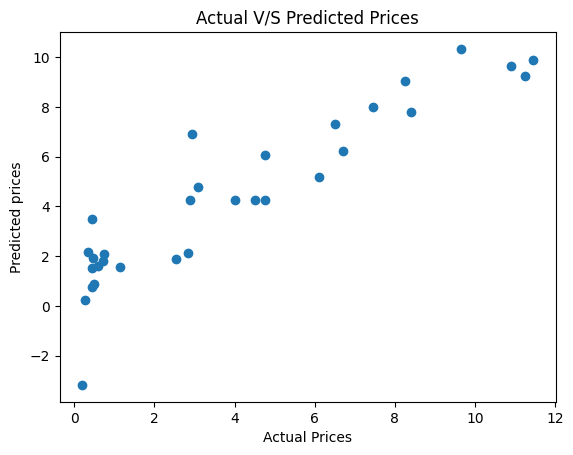

In [63]:
plt.scatter(Y_test,test_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted prices')
plt.title('Actual V/S Predicted Prices')
plt.show()

<!-- Predicting Using Lasso Regression Model
 -->

Predicting Using Lasso Regression Model...

In [64]:
LassoReg=Lasso()

In [65]:
LassoReg.fit(X_train,Y_train)

Lasso()

In [67]:
# Model Evaluation and prediction on training data...
training_data_pred=LassoReg.predict(X_train)

In [69]:
# R-Squared Error
score=metrics.r2_score(Y_train,training_data_pred)
score

0.8427856123435794

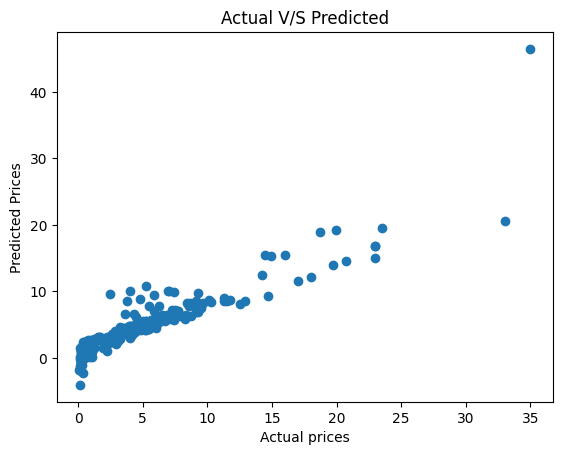

In [70]:
# Visualizing the Actuala and predicted prices
plt.scatter(Y_train,training_data_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predicted Prices')
plt.title('Actual V/S Predicted')
plt.show()

In [72]:
test_data_pred=LassoReg.predict(X_test)
# Calculating R-Squared for TEST Data
score=metrics.r2_score(Y_test,test_data_pred)
print(score)

0.8709167941173195


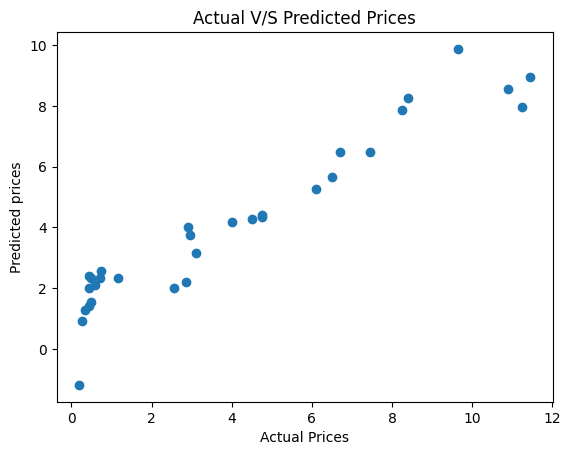

In [73]:
plt.scatter(Y_test,test_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted prices')
plt.title('Actual V/S Predicted Prices')
plt.show()